#personality_dataset

##🎯 Goal of the Dataset:
To predict a person's personality type (Introvert or Extrovert) based on their social behavior and habits (like time spent alone, event attendance, social energy, etc.).

##📝 Description
This dataset is designed to help predict a person's personality type—whether they are an Introvert or an Extrovert. It includes various features related to a person's social behavior and habits.

The dataset contains information about how much time a person spends alone and whether they have stage fear. It also includes how frequently they attend social events and how often they go outside.

Another important aspect in the dataset is whether the person feels drained after socializing. Additionally, the size of their friend circle and how often they post on social media are also recorded.

The final column in the dataset is the Personality label, which indicates if the person is an introvert or extrovert. This is the target variable we want to predict based on the other features.

This dataset can be used for psychological studies, building personality-based applications, or developing AI systems that adapt to user personality traits.



#Libraries

In [ ]:
#data wrangling and manipulation
import numpy as np #for numerical computatiions and array operations
import pandas as pd #for handling and manipulating structured data

#data visualization

import matplotlib.pyplot as plt #for basic plotting
import seaborn as sns #for advanced statistical visualizations

#Data preprocessing & feature engineering
from sklearn.preprocessing import StandardScaler #standardization (mean=0,variance=1)
from sklearn.preprocessing import MinMaxScaler #normaliazation (scales data between 0 and 1)
from sklearn.preprocessing import LabelEncoder #encodes categorical labels as numbers
from sklearn.preprocessing import OneHotEncoder #converts categorical features to one-hot encoding
from sklearn.impute import SimpleImputer #handles missing values

#Dimentionality Reduction & feature selection

from sklearn.decomposition import PCA #principal component analysis for dimensionality reduction
from sklearn.feature_selection import SelectKBest,f_classif #feature selection techniques

#Model Selection and Evaluation
from sklearn.model_selection import train_test_split #splits datasets into training and test sets
from sklearn.model_selection import cross_validate #performs cross-validation
from sklearn.model_selection import KFold #k-fold cross-validation
from sklearn.model_selection import GridSearchCV #Hyperparameter tuning usung grid search

#performance metrics

from sklearn.metrics import accuracy_score #Evaluates model accuracy
from sklearn.metrics import confusion_matrix #computes confusion matrix
from sklearn.metrics import classification_report #precision,recall,F1-score summary
from sklearn.metrics import precision_score #Precision metric
from sklearn.metrics import recall_score #recall metric
from sklearn.metrics import roc_auc_score #AUC-ROC score for evaluating classifiers
from sklearn import metrics #collection of evalution metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
#Handling Imbalanced Datasets

from imblearn.over_sampling import SMOTE #Sybthetic Minority over-sampling technique (for handling class imbalance)
from sklearn.utils import class_weight #assigns weights to imbalanced classes

#Machine Learning Algorithms - Classification
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression #Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbors classifier
from sklearn.svm import SVC #support vector classifier
from sklearn.ensemble import RandomForestClassifier #random forest classifier
from sklearn.naive_bayes import GaussianNB #naive bayes classifier
from xgboost import XGBClassifier #Extreme gradient boosting classifier
from sklearn.tree import DecisionTreeClassifier #decision tree classifier
from sklearn.ensemble import ExtraTreesClassifier #extra trees classifier
from sklearn.linear_model import SGDClassifier #Stochastic Gradient Descent classifier

#Utility Funtions

from sklearn.pipeline import make_pipeline #creates machine learning pipelines
from sklearn.datasets import make_classification #generates synthetic classification datasets
from sklearn import model_selection #Various model selection utilities
from sklearn import svm  #Support Vector Machines module
from sklearn import tree #decision tree-related utilites

#models
# for regression algorithms
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

#Reading and understanding of data

In [ ]:
import pandas as pd
df=pd.read_csv('personality_dataset (1).csv')
df

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


In [ ]:
df.shape

(2900, 8)

In [ ]:
df.head(10)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
5,1.0,No,7.0,5.0,No,6.0,6.0,Extrovert
6,4.0,No,9.0,NaN,No,7.0,7.0,Extrovert
7,2.0,No,8.0,4.0,No,7.0,8.0,Extrovert
8,10.0,Yes,1.0,3.0,Yes,0.0,3.0,Introvert
9,0.0,No,8.0,6.0,No,13.0,8.0,Extrovert


In [ ]:
df.tail(10)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
2890,8.0,Yes,2.0,0.0,Yes,1.0,2.0,Introvert
2891,6.0,Yes,3.0,1.0,Yes,5.0,1.0,Introvert
2892,9.0,Yes,2.0,0.0,Yes,1.0,2.0,Introvert
2893,9.0,NaN,2.0,0.0,Yes,4.0,2.0,Introvert
2894,0.0,No,9.0,3.0,No,12.0,NaN,Extrovert
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert
2899,3.0,No,6.0,6.0,No,6.0,9.0,Extrovert


In [ ]:
df.sample(10)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
1813,0.0,No,5.0,3.0,No,14.0,5.0,Extrovert
2527,NaN,Yes,1.0,0.0,NaN,5.0,1.0,Introvert
899,10.0,Yes,0.0,2.0,Yes,0.0,1.0,Introvert
2156,0.0,No,6.0,3.0,No,NaN,7.0,Extrovert
1723,9.0,Yes,NaN,2.0,Yes,4.0,1.0,Introvert
1098,7.0,Yes,3.0,0.0,Yes,4.0,1.0,Introvert
2528,4.0,Yes,0.0,1.0,Yes,1.0,0.0,Introvert
2802,5.0,Yes,0.0,0.0,Yes,4.0,2.0,Introvert
542,11.0,Yes,3.0,0.0,Yes,0.0,1.0,Introvert
828,3.0,No,7.0,4.0,No,14.0,7.0,Extrovert


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [ ]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [ ]:
df.describe(include=['O'])

,Stage_fear,Drained_after_socializing,Personality
count,2827,2848,2900
unique,2,2,2
top,No,No,Extrovert
freq,1417,1441,1491


#visualizations of the features

##Time_spent_Alone

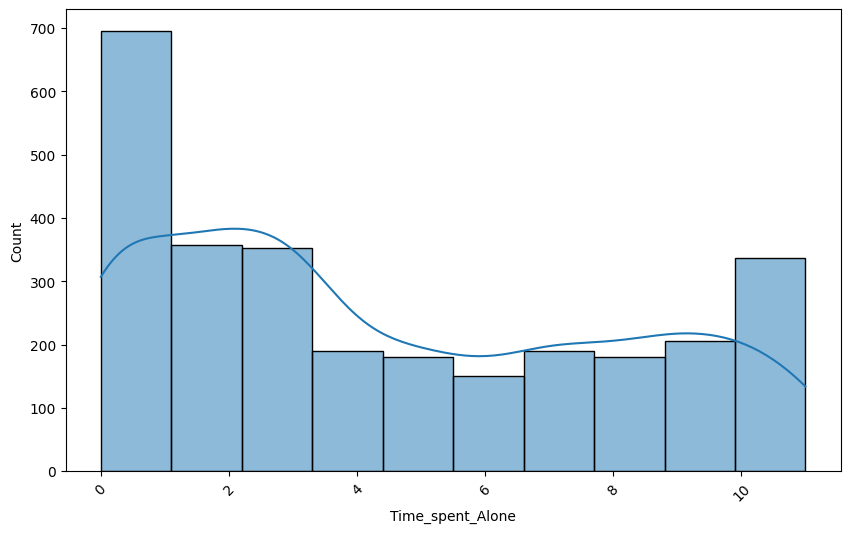

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Time_spent_Alone'],kde=True,bins=10)
plt.xticks(rotation=45)
plt.show()


##Stage_fear

In [ ]:
df["Stage_fear"].value_counts()

,count
Stage_fear,
No,1417
Yes,1410


##Social_event_attendance

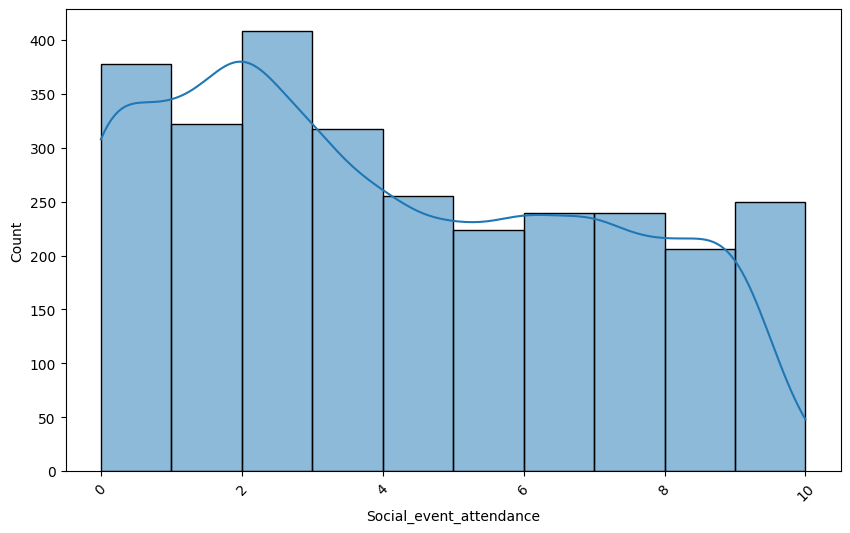

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Social_event_attendance'],kde=True,bins=10)
plt.xticks(rotation=45)
plt.show()

##Going_outside

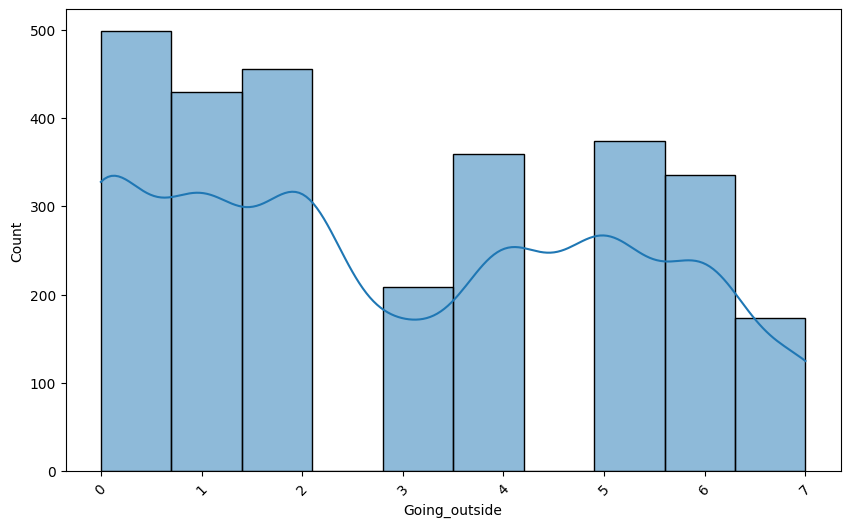

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Going_outside'],kde=True,bins=10)
plt.xticks(rotation=45)
plt.show()

##Drained_after_socializing

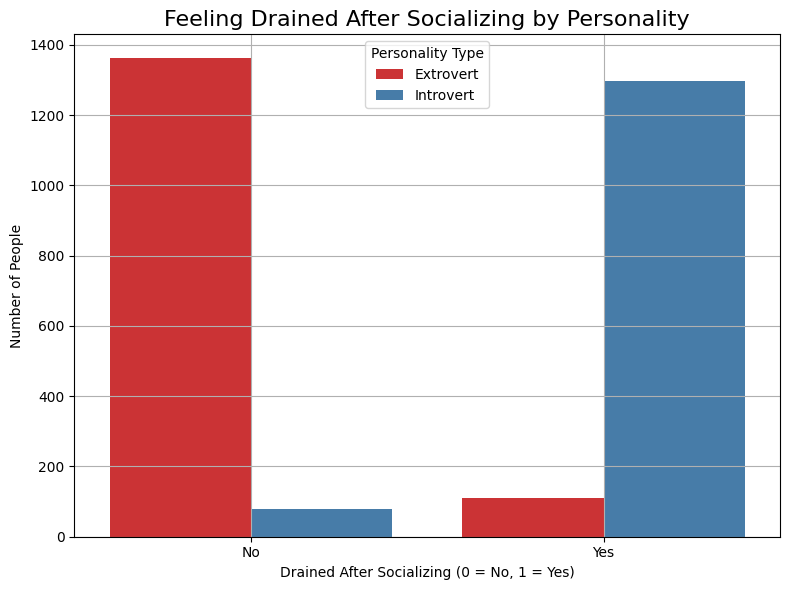

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Drained_after_socializing', hue='Personality', palette='Set1')
plt.title("Feeling Drained After Socializing by Personality", fontsize=16)
plt.xlabel("Drained After Socializing (0 = No, 1 = Yes)")
plt.ylabel("Number of People")
plt.legend(title="Personality Type")
plt.grid(True)
plt.tight_layout()
plt.show()

##Friends_circle_size

<ipython-input-15-2477910380>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Personality', y='Friends_circle_size', palette="Set2")


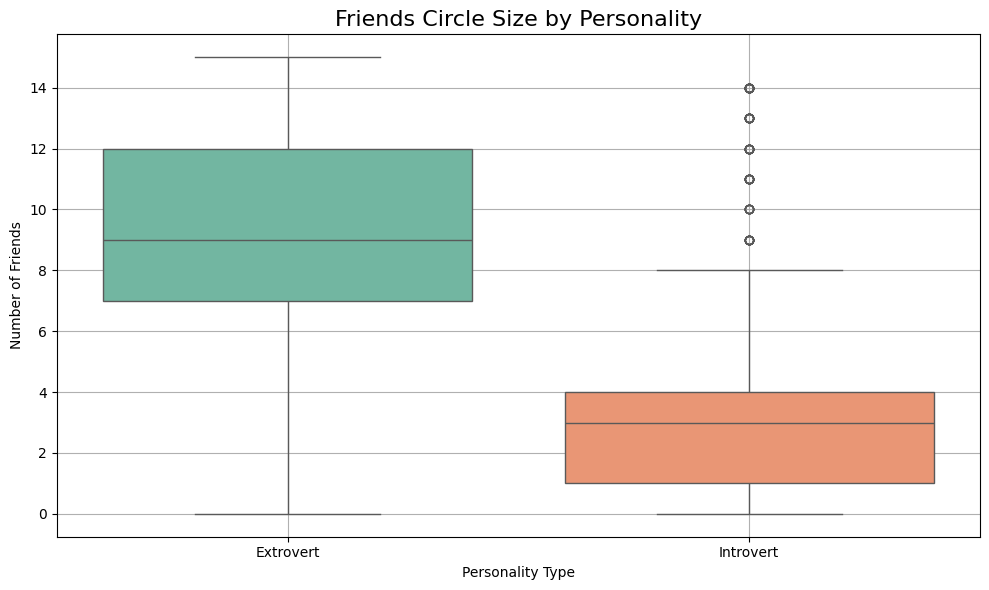

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Personality', y='Friends_circle_size', palette="Set2")
plt.title("Friends Circle Size by Personality", fontsize=16)
plt.xlabel("Personality Type")
plt.ylabel("Number of Friends")
plt.grid(True)
plt.tight_layout()
plt.show()


##Post_frequency             

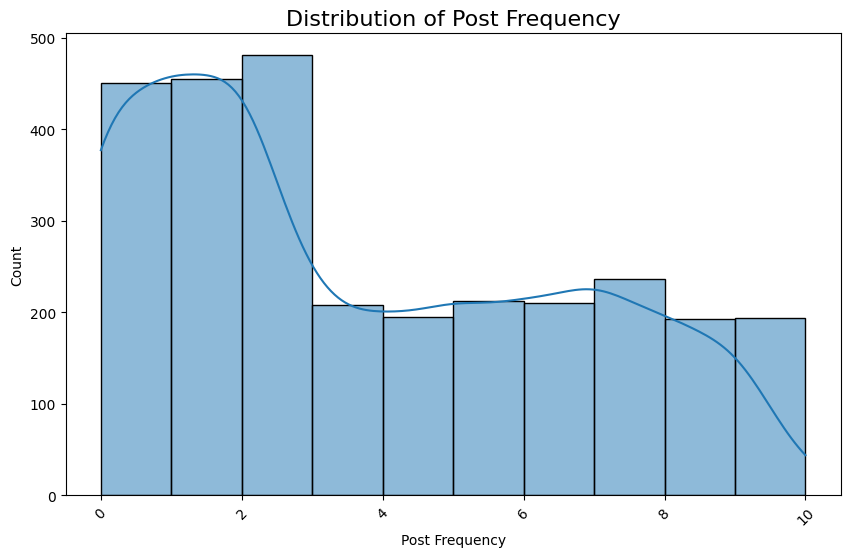

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Post_frequency'], kde=True, bins=10)
plt.title('Distribution of Post Frequency', fontsize=16)
plt.xlabel('Post Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

##Personality

<ipython-input-17-2228253256>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Personality', palette='viridis')


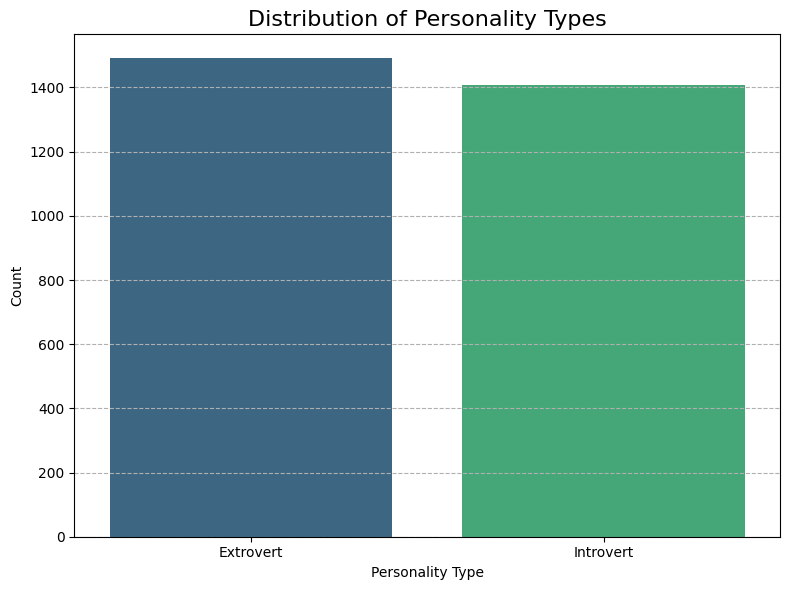

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Personality', palette='viridis')
plt.title('Distribution of Personality Types', fontsize=16)
plt.xlabel('Personality Type')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

#Data Cleaning


##Handle Missing Values

In [ ]:
df.isnull().sum()

,0
Time_spent_Alone,63
Stage_fear,73
Social_event_attendance,62
Going_outside,66
Drained_after_socializing,52
Friends_circle_size,77
Post_frequency,65
Personality,0


In [ ]:
df.duplicated().sum()

np.int64(388)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# Fill numeric columns with mean
df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].mean(), inplace=True)
df['Social_event_attendance'].fillna(df['Social_event_attendance'].mean(), inplace=True)
df['Going_outside'].fillna(df['Going_outside'].mean(), inplace=True)
df['Friends_circle_size'].fillna(df['Friends_circle_size'].mean(), inplace=True)
df['Post_frequency'].fillna(df['Post_frequency'].mean(), inplace=True)
# Alternatively, you can use median if data is skewed
# df['column_name'].fillna(la['column_name'].median(), inplace=True

<ipython-input-21-823278065>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Time_spent_Alone'].fillna(df['Time_spent_Alone'].mean(), inplace=True)
<ipython-input-21-823278065>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [ ]:
# Fill categorical Yes/No columns with most frequent value (mode)
df['Stage_fear'].fillna(df['Stage_fear'].mode()[0], inplace=True)
df['Drained_after_socializing'].fillna(df['Drained_after_socializing'].mode()[0], inplace=True)


<ipython-input-22-2365001954>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Stage_fear'].fillna(df['Stage_fear'].mode()[0], inplace=True)
<ipython-input-22-2365001954>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [ ]:
# Also check target column
df['Personality'].fillna(df['Personality'].mode()[0], inplace=True)


<ipython-input-23-3384028188>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Personality'].fillna(df['Personality'].mode()[0], inplace=True)


In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2503 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2503 non-null   float64
 1   Stage_fear                 2503 non-null   object 
 2   Social_event_attendance    2503 non-null   float64
 3   Going_outside              2503 non-null   float64
 4   Drained_after_socializing  2503 non-null   object 
 5   Friends_circle_size        2503 non-null   float64
 6   Post_frequency             2503 non-null   float64
 7   Personality                2503 non-null   object 
dtypes: float64(5), object(3)
memory usage: 176.0+ KB


# Encoding

## Label Encoding

In [ ]:
##Label Encoding

# Make a copy to avoid changing original
df = df.copy()

# Encode binary Yes/No features
df['Stage_fear'] = df['Stage_fear'].map({'No': 0, 'Yes': 1})
df['Drained_after_socializing'] = df['Drained_after_socializing'].map({'No': 0, 'Yes': 1})

# Encode target label: Introvert = 0, Extrovert = 1
df['Personality'] = df['Personality'].map({'Introvert': 0, 'Extrovert': 1})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2503 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2503 non-null   float64
 1   Stage_fear                 2503 non-null   int64  
 2   Social_event_attendance    2503 non-null   float64
 3   Going_outside              2503 non-null   float64
 4   Drained_after_socializing  2503 non-null   int64  
 5   Friends_circle_size        2503 non-null   float64
 6   Post_frequency             2503 non-null   float64
 7   Personality                2503 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 176.0 KB


#Scaling

## Standard Scaling

In [ ]:
# Create a copy of the original data for comparison
loan_scales_df=df.copy()
#Select numaric columns,excluding "Flight fare"
numaric_columns=df.drop(columns=["Personality"]).select_dtypes(include=["number"]).columns
# Initialize the standardScalar
scalar=StandardScaler()

# Apply the scalar only to the numaric columns
loan_scales_df[numaric_columns]=scalar.fit_transform(df[numaric_columns])
loan_scales_df.head()


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,-0.064761,-0.879012,-0.073732,1.264536,-0.877585,1.504098,0.402999,1
1,1.404119,1.137640,-1.465619,-1.443119,1.139491,-1.549528,-0.283284,0
2,1.404119,1.137640,-1.117647,-0.540567,1.139491,-0.375057,-0.626425,0
3,-1.239864,-0.879012,0.622211,1.715811,-0.877585,1.738993,1.432423,1
4,-0.358537,-0.879012,1.666126,0.361984,-0.877585,0.329627,0.402999,1


# Model Training and Evaluvation

In [ ]:
x=df.drop(['Personality'],axis=1)
y=df['Personality']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print('Shape of Training Features:',x_train.shape)
print('Shape of Testing Features:',x_test.shape)
print('Shape of Training Target:',y_train.shape)
print('Shape of Testing Target:',y_test.shape)

Shape of Training Features: (2002, 7)
Shape of Testing Features: (501, 7)
Shape of Training Target: (2002,)
Shape of Testing Target: (501,)


## Logistic Regression model

In [ ]:
#Initializing Logistic regression model
logreg=LogisticRegression()
#Train the model
logreg.fit(x_train,y_train)
#predictions
y_pred=logreg.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy:.4f}")

Accuracy:0.9261


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test,y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       229
           1       0.95      0.92      0.93       272

    accuracy                           0.93       501
   macro avg       0.93      0.93      0.93       501
weighted avg       0.93      0.93      0.93       501



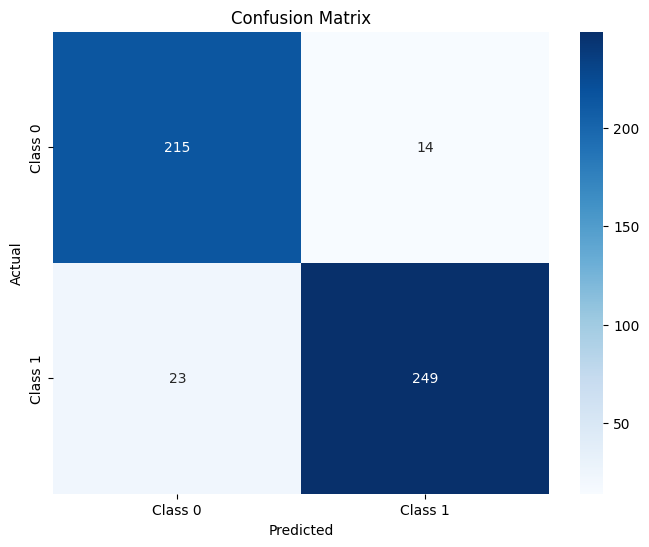

In [ ]:
#Confusion matrix
conf_matrix=confusion_matrix(y_test,y_pred)
#plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=["Class 0","Class 1"],
            yticklabels=["Class 0","Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##Best Classification model

Training and evaluvating Logistic Regression...
Accuracy:0.926148

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       229
           1       0.95      0.92      0.93       272

    accuracy                           0.93       501
   macro avg       0.93      0.93      0.93       501
weighted avg       0.93      0.93      0.93       501



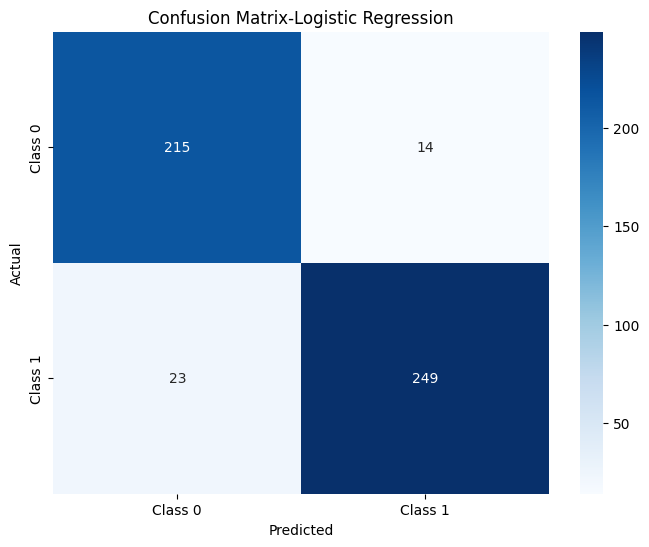

--------------------------------------------------------------------------------
Training and evaluvating Random Forest...
Accuracy:0.894212

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       229
           1       0.91      0.90      0.90       272

    accuracy                           0.89       501
   macro avg       0.89      0.89      0.89       501
weighted avg       0.89      0.89      0.89       501



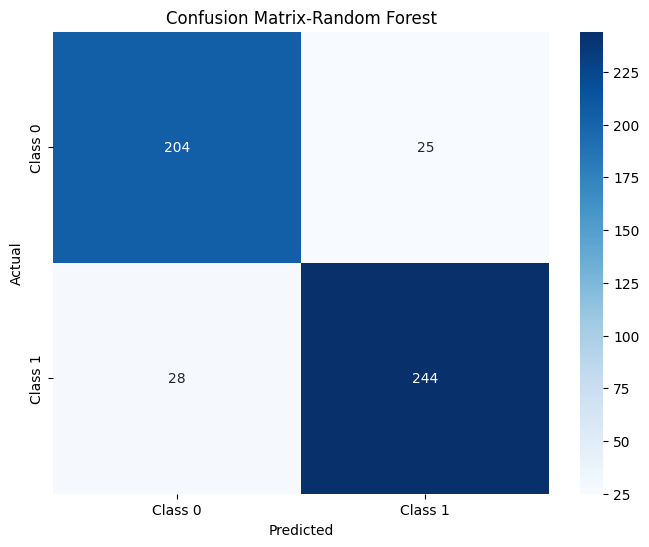

--------------------------------------------------------------------------------
Training and evaluvating Decision Tree...
Accuracy:0.872255

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       229
           1       0.91      0.85      0.88       272

    accuracy                           0.87       501
   macro avg       0.87      0.87      0.87       501
weighted avg       0.87      0.87      0.87       501



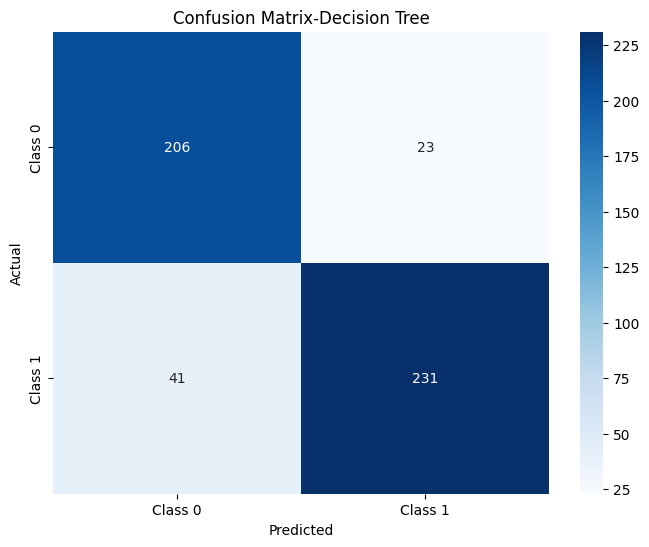

--------------------------------------------------------------------------------
Training and evaluvating K-Nearest neighbors...
Accuracy:0.932136

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       229
           1       0.96      0.91      0.94       272

    accuracy                           0.93       501
   macro avg       0.93      0.93      0.93       501
weighted avg       0.93      0.93      0.93       501



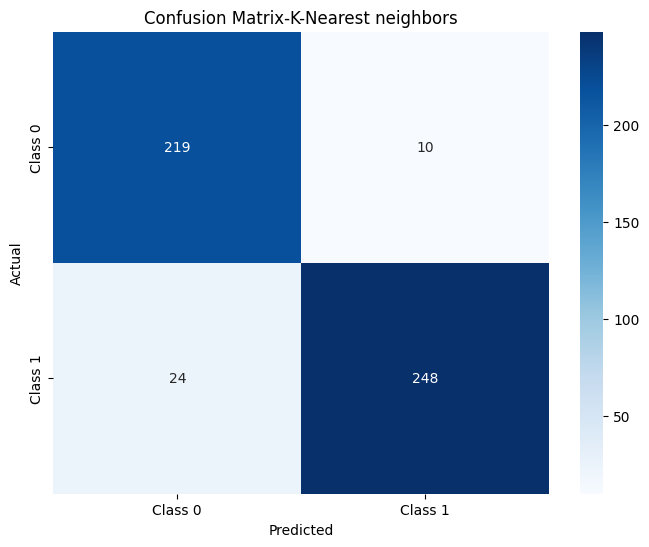

--------------------------------------------------------------------------------
Training and evaluvating Support Vector Machine...
Accuracy:0.926148

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       229
           1       0.95      0.92      0.93       272

    accuracy                           0.93       501
   macro avg       0.93      0.93      0.93       501
weighted avg       0.93      0.93      0.93       501



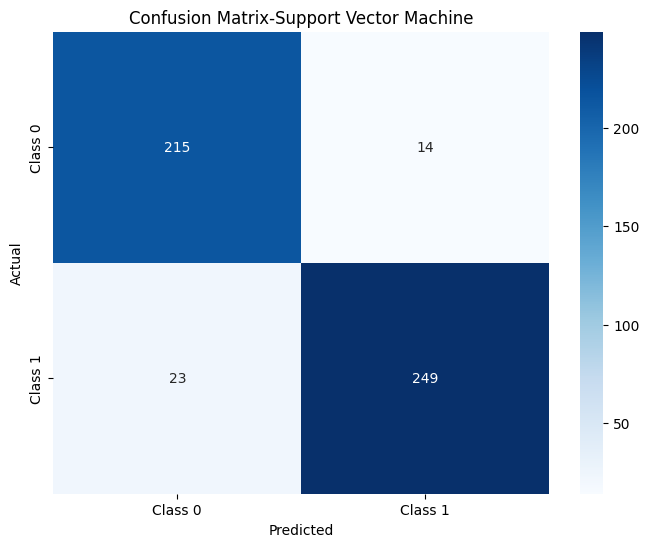

--------------------------------------------------------------------------------
Training and evaluvating Extra Trees...
Accuracy:0.898204

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       229
           1       0.91      0.90      0.91       272

    accuracy                           0.90       501
   macro avg       0.90      0.90      0.90       501
weighted avg       0.90      0.90      0.90       501



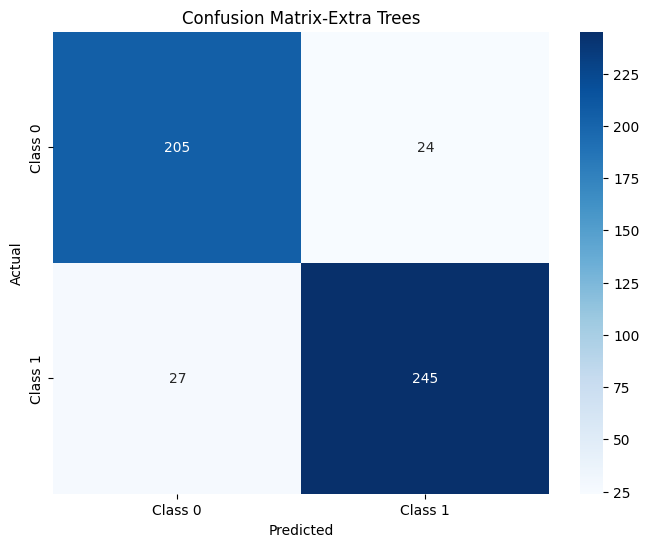

--------------------------------------------------------------------------------


<ipython-input-37-1313941855>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names,y=accuracies,palette="viridis")


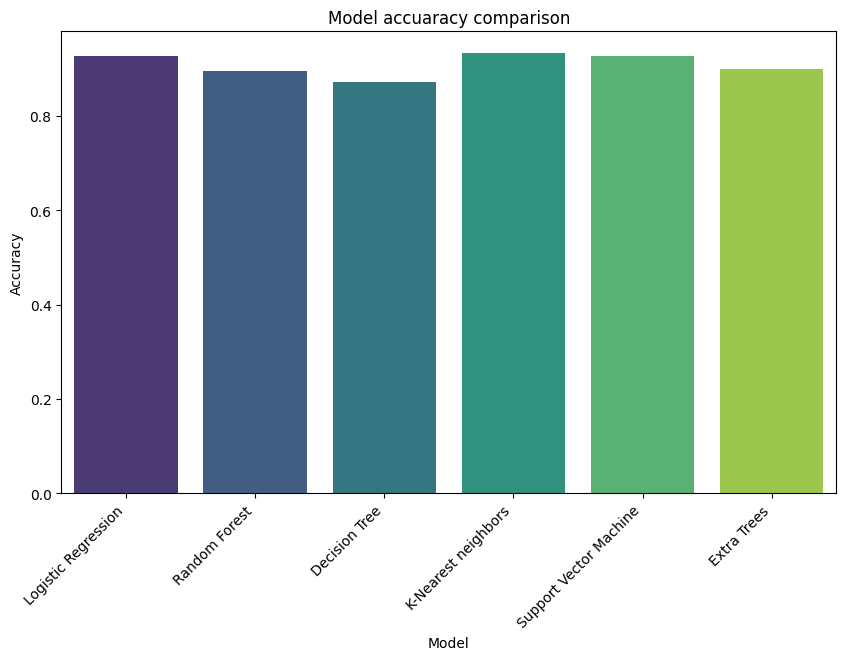

In [ ]:
# Define models to evaluvate
models={
    "Logistic Regression":LogisticRegression(),
    "Random Forest":RandomForestClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "K-Nearest neighbors":KNeighborsClassifier(n_neighbors=11),
    "Support Vector Machine":SVC(kernel="linear",probability=True),
    "Extra Trees":ExtraTreesClassifier()}

# Initialize a list to store model name s and accuracies
model_accuracies=[]

# Loop through models,train and evaluvate
for model_name, model in models.items():
  print(f"Training and evaluvating {model_name}...")

  # Train the model
  model.fit(x_train,y_train)

  #Pridctions
  y_pred=model.predict(x_test)

  #Accuracy
  accuracy=accuracy_score(y_test,y_pred)
  model_accuracies.append((model_name,accuracy))
  print(f"Accuracy:{accuracy:4f}")

  #Classification Report
  print("\nClassification Report:")
  print(classification_report(y_test,y_pred))

  #Confusion Matrix
  conf_matrix=confusion_matrix(y_test,y_pred)

  #plot confusion matrix
  plt.figure(figsize=(8,6))
  sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=["Class 0","Class 1"],yticklabels=["Class 0","Class 1"])
  plt.title(f"Confusion Matrix-{model_name}")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

  # Seperate a line for readability betweem models
  print("-"*80)

# Plotting the accuracies of all models
model_names=[model_name for model_name, _ in model_accuracies]
accuracies=[accuracy for _, accuracy in model_accuracies]

# create a bar plot for accuracy comparison
plt.figure(figsize=(10,6))
sns.barplot(x=model_names,y=accuracies,palette="viridis")
plt.title("Model accuaracy comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45,ha="right")
plt.show()



Training and Evaluating Logistic Regression with Oversampling(SMOTE)
Accuracy (oversampling - SMOTE):0.9142

Classifiaction Report (oversampling - SMOTE):
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       229
           1       0.95      0.89      0.92       272

    accuracy                           0.91       501
   macro avg       0.91      0.92      0.91       501
weighted avg       0.92      0.91      0.91       501



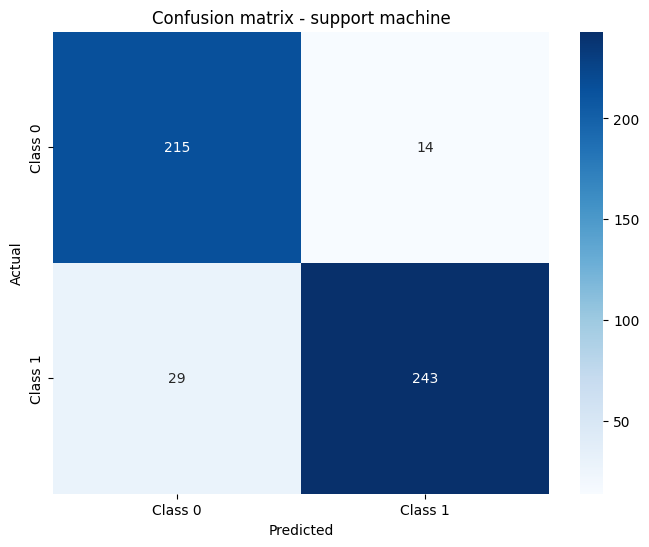

In [ ]:
#Apply oversampling (Smote)
print('\nTraining and Evaluating Logistic Regression with Oversampling(SMOTE)')

smote=SMOTE(random_state=42)
x_train_resampled,y_train_resampled=smote.fit_resampled=smote.fit_resample(x_train,y_train)
#tain model on resampled data
model.fit(x_train_resampled,y_train_resampled)

#predictions
y_pred_oversample=model.predict(x_test)
#Accuracy
accuracy_oversample=accuracy_score(y_test,y_pred_oversample)
print(f"Accuracy (oversampling - SMOTE):{accuracy_oversample:.4f}")

# Classification report
print("\nClassifiaction Report (oversampling - SMOTE):")
print(classification_report(y_test, y_pred_oversample))

# Confusion matrix
conf_matrix_oversample=confusion_matrix(y_test,y_pred_oversample)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_oversample,annot=True,fmt="d",cmap="Blues",xticklabels=["Class 0","Class 1"],yticklabels=["Class 0","Class 1"])
plt.title("Confusion matrix - support machine")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
import pickle
from sklearn.neighbors import KNeighborsClassifier

# Train the model (assuming x_train and y_train are already defined and preprocessed)
model = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors
model.fit(x_train, y_train)

# Save the trained model using pickle
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(model, file)
    print("KNN model saved to 'knn_model.pkl'.")

KNN model saved to 'knn_model.pkl'.
